# Autoregressive process (AR) 
- necessary to be stationary 
- random walk $(X_t=Z_t+X_{t-1})$를 일반화한 것 
  - 즉, $X_t=Z_t+\text{history}$ $(\text{where, history}=\phi_1X_{t-1}+\phi_2X_{t-2}+ \cdots +\phi_pX_{t-p})$ 
  - $Z \sim iid(0, \sigma^2)$

# simulate an AR(1)

In [2]:
# 1) phi=0.4 모델
set.seed(2016)
N=1000
phi=0.4
Z=rnorm(N,0,1) 
X=NULL
X[1]=Z[1]

# AR(1) 모델
for (t in 2:N) {
  X[t] = Z[t] + phi*X[t-1]  
}

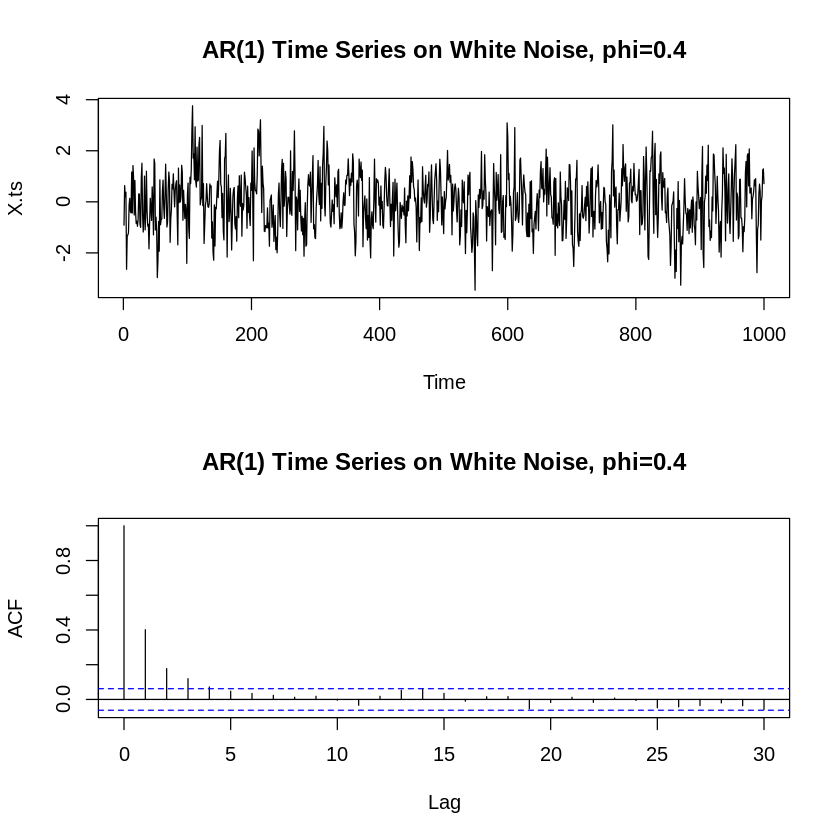

In [3]:
# 시계열 데이터로 변환
X.ts=ts(X) 

# 2행1열로 시계열 그래프와 ACF 그리기
par(mfrow=c(2,1))
plot(X.ts,main="AR(1) Time Series on White Noise, phi=0.4")
x.acf=acf(X.ts,main="AR(1) Time Series on White Noise, phi=0.4")

phi=0.4 일 때, 약간의 자기상관성이 있음

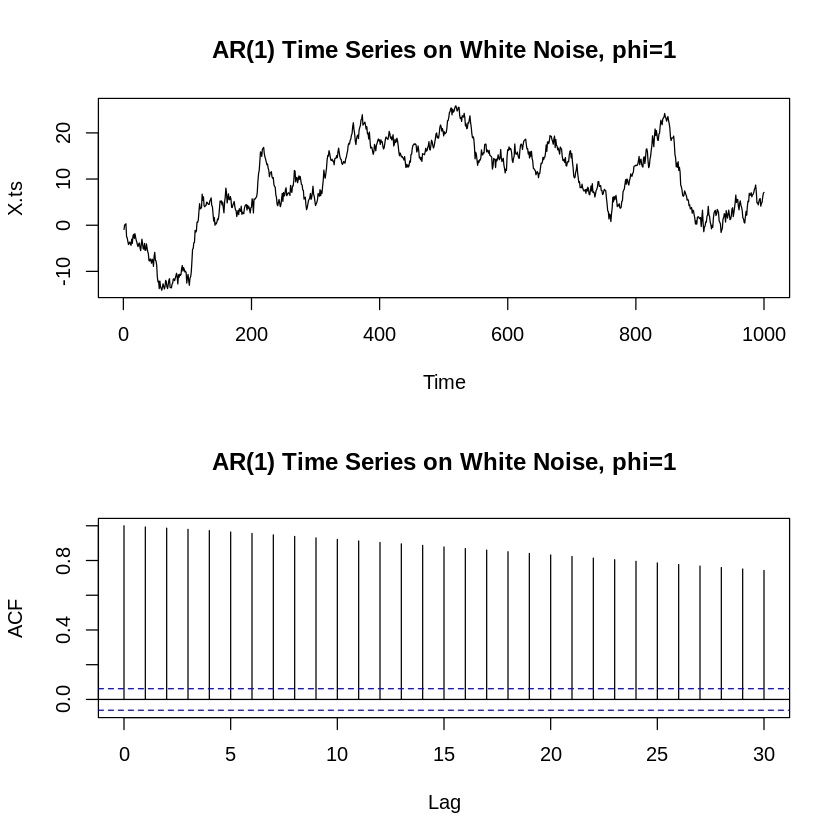

In [4]:
# 2) phi=1 모델
set.seed(2016)
N=1000
phi=1
Z=rnorm(N,0,1) 
X=NULL
X[1]=Z[1]

# AR(1) 모델
for (t in 2:N) {
  X[t] = Z[t] + phi*X[t-1]  
}

# 시계열 데이터로 변환
X.ts=ts(X) 

# 2행1열로 시계열 그래프와 ACF 그리기
par(mfrow=c(2,1))
plot(X.ts,main="AR(1) Time Series on White Noise, phi=1")
x.acf=acf(X.ts,main="AR(1) Time Series on White Noise, phi=1")

phi=1 일 때, 매우 큰 자기상관성이 있음

# Simulate an AR(2) 

## Stationarity of an AR(2)
- AR(2)에서 정상 시계열을 가질 조건들
$$-1<\phi_2<1$$ 
$$\phi_2<1+\phi_1$$
$$\phi_2<1-\phi_1$$

Example 1)

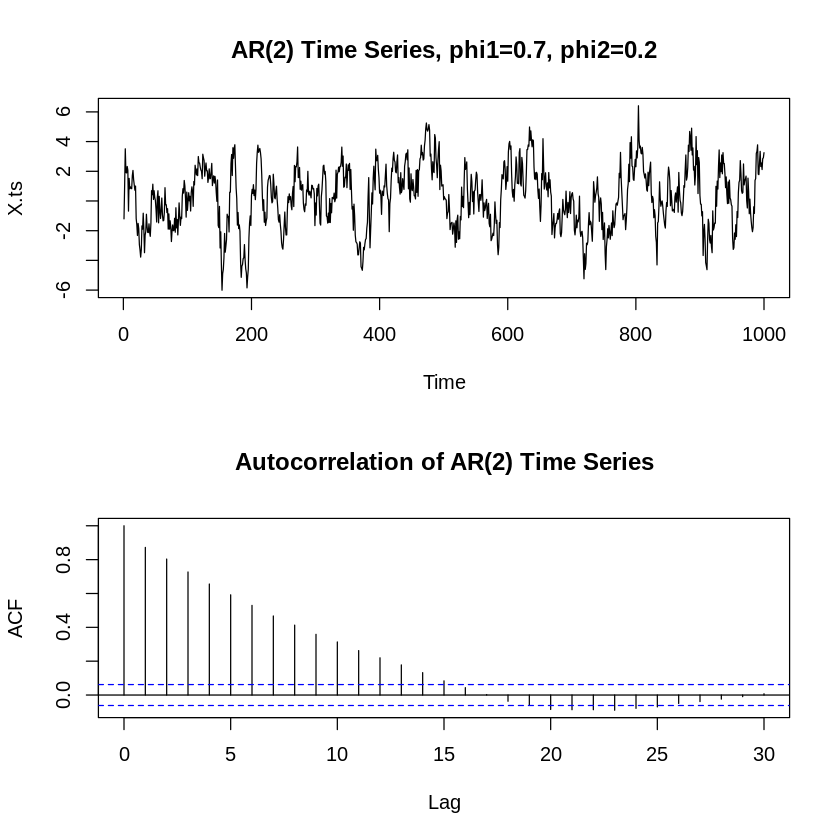

In [9]:
set.seed(2017)

# arima.sim() 명령어 이용해서 simulate 
# ar의 계수값 지정하여 시계열 데이터 X 생성
X.ts<-arima.sim(list(ar=c(0.7, 0.2)), n=1000)

# 2행1열로 시계열 그래프와 ACF 그리기
par(mfrow=c(2,1))
plot(X.ts, main="AR(2) Time Series, phi1=0.7, phi2=0.2")
X.acf=acf(X.ts, main="Autocorrelation of AR(2) Time Series")

=> 자기상관성이 높음

Example 2)

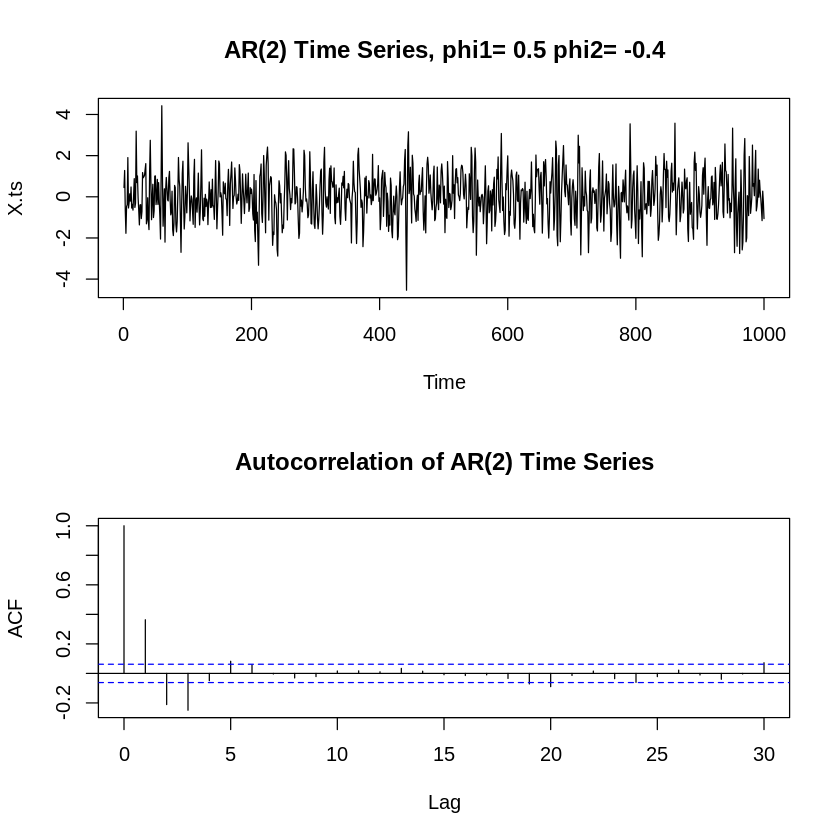

In [13]:
set.seed(2017)

# arima.sim() 명령어 이용해서 simulate 
# ar의 계수값 지정하여 시계열 데이터 X 생성
phi1=0.5
phi2=-0.4
X.ts<-arima.sim(list(ar=c(phi1, phi2)), n=1000)

# 2행1열로 시계열 그래프와 ACF 그리기
par(mfrow=c(2,1))
plot(X.ts, main=paste("AR(2) Time Series, phi1=",phi1, "phi2=",phi2))
X.acf=acf(X.ts, main="Autocorrelation of AR(2) Time Series")

=> 자기상관성 낮음

Example 3) 
- staionary 하기 위한 coefficient 조건이 충족되지 않으면 ```arima.sim()``` 명령어는 실행되지 않음 
  - "'ar' part of model is not stationary"

In [14]:
par(mfrow=c(2,1))

phi1 = .7; phi2 = .4;
X.ts <- arima.sim(list(ar = c(phi1, phi2)), n=1000)
plot(X.ts,main=paste("AR(2) Time Series, phi1=",phi1,"phi2=",phi2))
acf(X.ts,main="ACF")

ERROR: ignored